Epoch 1/50
86/86 - 5s - loss: 0.0358 - 5s/epoch - 58ms/step
Epoch 2/50
86/86 - 0s - loss: 4.3660e-04 - 457ms/epoch - 5ms/step
Epoch 3/50
86/86 - 0s - loss: 1.6196e-04 - 431ms/epoch - 5ms/step
Epoch 4/50
86/86 - 0s - loss: 1.1326e-04 - 439ms/epoch - 5ms/step
Epoch 5/50
86/86 - 0s - loss: 7.2233e-05 - 405ms/epoch - 5ms/step
Epoch 6/50
86/86 - 0s - loss: 4.2120e-05 - 421ms/epoch - 5ms/step
Epoch 7/50
86/86 - 0s - loss: 2.2543e-05 - 430ms/epoch - 5ms/step
Epoch 8/50
86/86 - 0s - loss: 1.0916e-05 - 370ms/epoch - 4ms/step
Epoch 9/50
86/86 - 0s - loss: 5.1546e-06 - 285ms/epoch - 3ms/step
Epoch 10/50
86/86 - 0s - loss: 2.5018e-06 - 296ms/epoch - 3ms/step
Epoch 11/50
86/86 - 0s - loss: 1.5304e-06 - 279ms/epoch - 3ms/step
Epoch 12/50
86/86 - 0s - loss: 1.1831e-06 - 291ms/epoch - 3ms/step
Epoch 13/50
86/86 - 0s - loss: 1.0906e-06 - 278ms/epoch - 3ms/step
Epoch 14/50
86/86 - 0s - loss: 1.0890e-06 - 293ms/epoch - 3ms/step
Epoch 15/50
86/86 - 0s - loss: 1.0599e-06 - 286ms/epoch - 3ms/step
Epoch 16/5

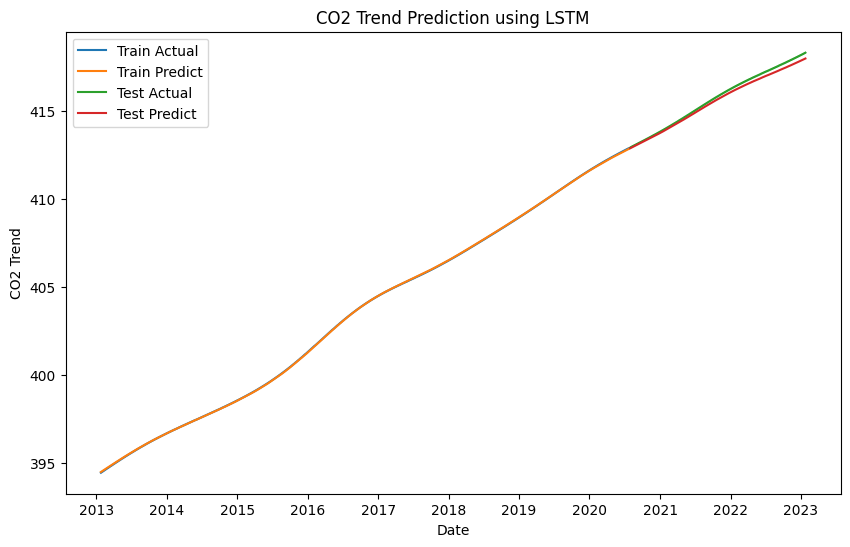

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import TimeSeriesSplit

# Load data
file_path = 'Daily atmospheric CO2 concentration.csv'
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)
data = data['trend']  # focusing on 'trend' for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Split the data into training and testing sets
n = len(data_scaled)
train_size = int(n * 0.75)
test_size = n - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:n,:]

look_back = 5  # Number of previous time steps to consider for predicting the next step
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

# Plotting
plt.figure(figsize=(10,6))
plt.plot(data.index[look_back:len(train_predict)+look_back], y_train_inv[0], label='Train Actual')
plt.plot(data.index[look_back:len(train_predict)+look_back], train_predict[:,0], label='Train Predict')
plt.plot(data.index[len(train_predict)+(look_back*2)+1:len(data)-1], y_test_inv[0], label='Test Actual')
plt.plot(data.index[len(train_predict)+(look_back*2)+1:len(data)-1], test_predict[:,0], label='Test Predict')
plt.title('CO2 Trend Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('CO2 Trend')
plt.legend()
plt.show()


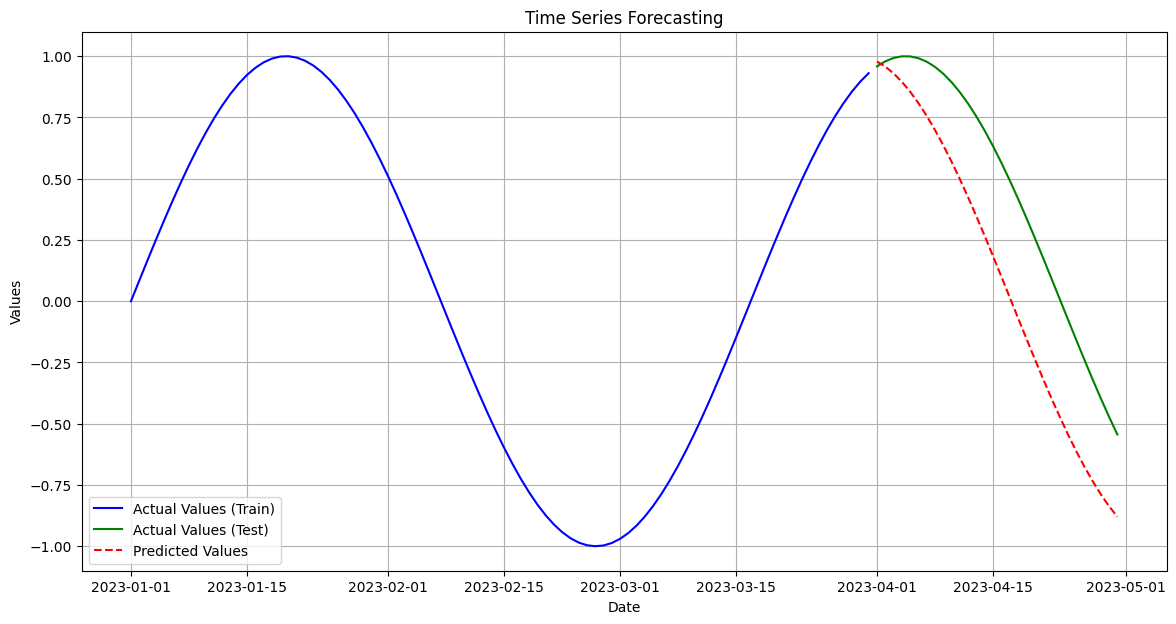

In [6]:
#visualization
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'dates' are the datetime indices and we have 'actual_values' and 'predicted_values'
dates = np.array(pd.date_range(start='2023-01-01', periods=120, freq='D'))
actual_values = np.sin(np.linspace(0, 10, 120))  # Example data
predicted_values = np.sin(np.linspace(0, 10, 120) + 0.5)  # Shifted sine wave as predicted data

plt.figure(figsize=(14, 7))
plt.plot(dates[:90], actual_values[:90], label='Actual Values (Train)', color='blue')  # Train period
plt.plot(dates[90:], actual_values[90:], label='Actual Values (Test)', color='green')  # Test period
plt.plot(dates[90:], predicted_values[90:], label='Predicted Values', color='red', linestyle='--')  # Forecast

plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Load and prepare the data
data = pd.read_csv('Daily atmospheric CO2 concentration.csv')
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)
data = data['trend']  # focusing on 'trend' for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

# Function to create sequences
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 5
X, y = create_dataset(data_scaled, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Define LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Prepare cross-validation
tscv = TimeSeriesSplit(n_splits=3)
fold_idx = 1
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model = create_lstm_model()
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # set verbose to 0 for no output during training

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate and print the performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Fold {fold_idx}: MSE = {mse:.4f}, RMSE = {rmse:.4f}")
    fold_idx += 1


29/29 [==============================] - 0s 2ms/step
Fold 1: MSE = 0.0000, RMSE = 0.0023
29/29 [==============================] - 1s 2ms/step
Fold 2: MSE = 0.0000, RMSE = 0.0052
29/29 [==============================] - 0s 2ms/step
Fold 3: MSE = 0.0000, RMSE = 0.0058
